# Hysteresis example

Given calibration of an instrument for an increasing and decreasing input $x$ [mV] and output of the instrument $y$ [mV]



In [1]:
import numpy as np
import pylab as pl


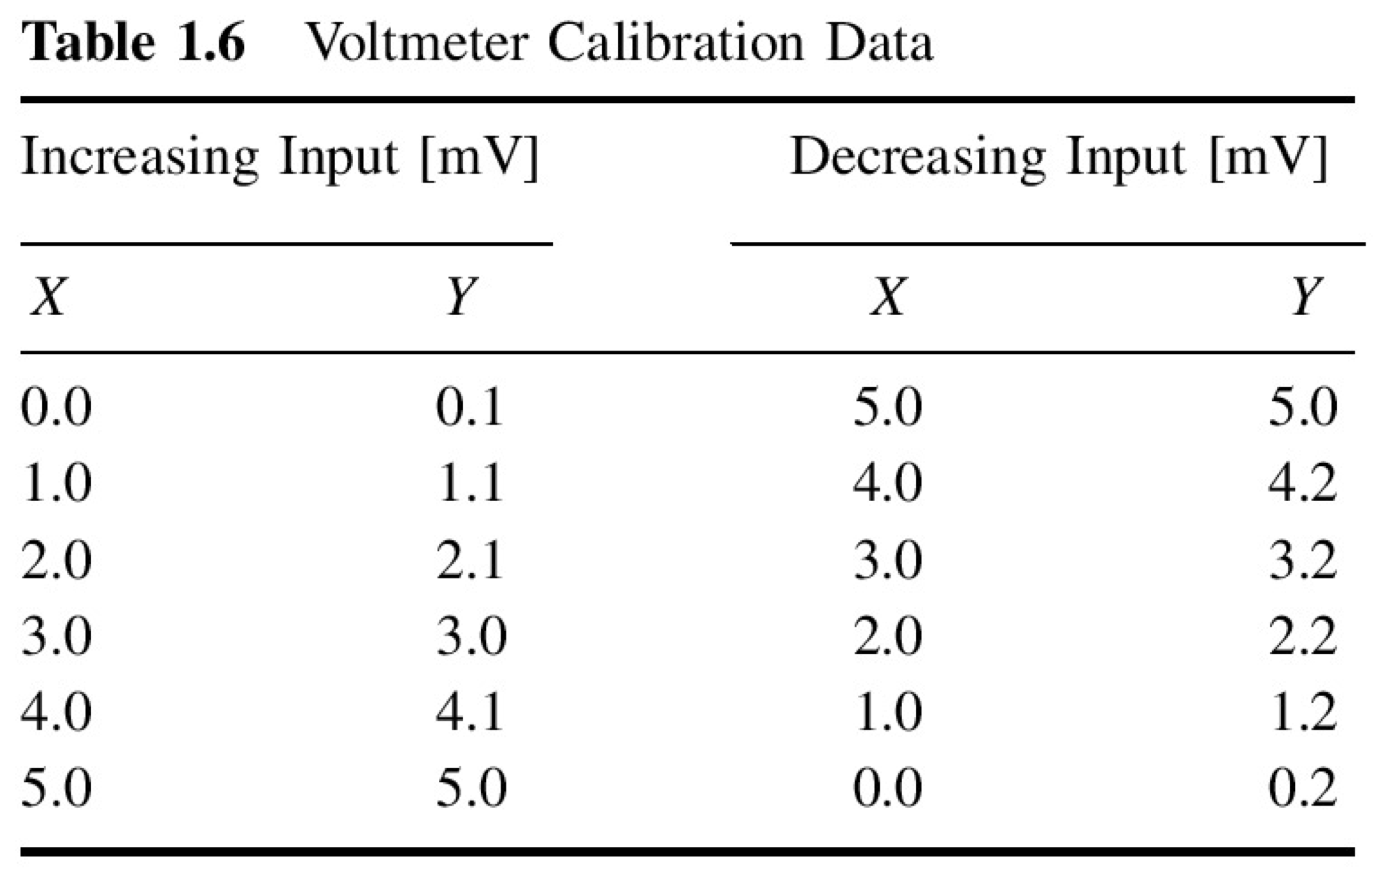

In [2]:
from IPython.core.display import Image 
Image(filename='../img/hysteresis_example.png')

In [3]:
x = np.array([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 5.0, 4.0, 3.0, 2.0, 1.0, 0.0])
y = np.array([0.1, 1.1, 2.1, 3.0, 4.1, 5.0, 5.0, 4.2, 3.2, 2.2, 1.2, 0.2])


Text(0, 0.5, '$y$ [mV]')

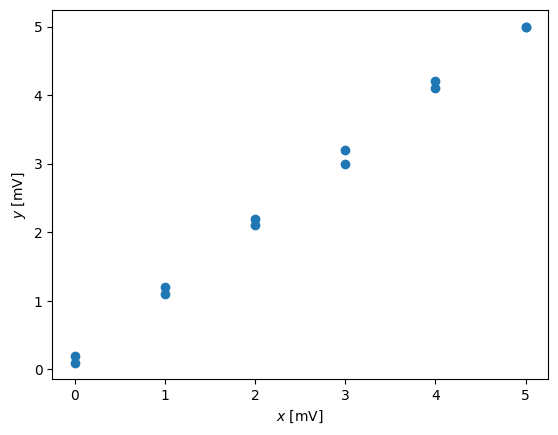

In [4]:
pl.plot(x,y,'o')
pl.xlabel('$x$ [mV]')
pl.ylabel('$y$ [mV]')


1. We see the error, but we do not know if it is a random or not
2. In order to see the hysteresis, we have to set the plot with the lines connecting points:

Text(0, 0.5, '$y$ [mV]')

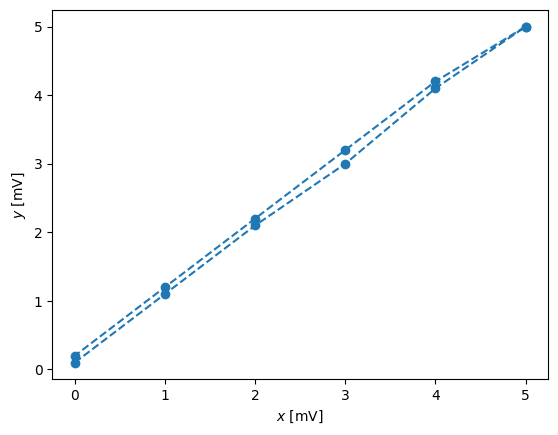

In [5]:
pl.plot(x,y,'--o')
pl.xlabel('$x$ [mV]')
pl.ylabel('$y$ [mV]')

### Estimate the hysteresis error:

$e_h = y_{up} - y_{down}$

$e_{h_{max}} = max(|e_h|)$

$e_{h_{max}}\% = 100\% \cdot \frac{e_{h_{max}}}{y_{max}-y_{min}} $

In [6]:
e_h = y[:6]-np.flipud(y[6:]) 
print(f"e_h = {e_h} [mV]")

e_h = [-0.1 -0.1 -0.1 -0.2 -0.1  0. ] [mV]


In [7]:
e_hmax = np.max(np.abs(e_h))
print("e_hmax= %3.2f %s" % (e_hmax,"[mV]"))

e_hmax= 0.20 [mV]


In [8]:
e_hmax_p = 100*e_hmax/(np.max(y) - np.min(y))
print("Relative error = %3.2f%s FSO" % (e_hmax_p,"%"))

Relative error = 4.08% FSO


# Sensitivity error example

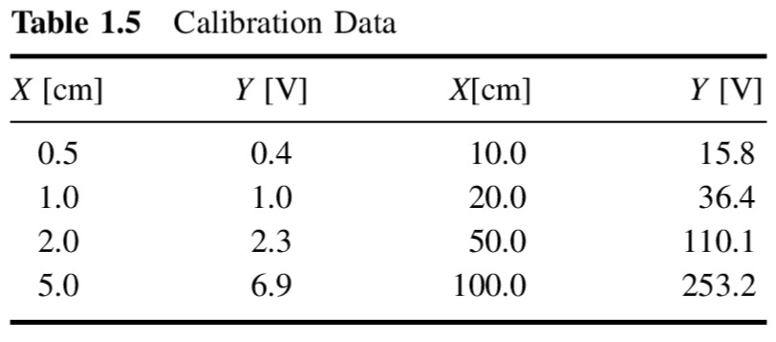

In [9]:
from IPython.core.display import Image 
Image(filename='../img/sensitivity_error_example.png') 

In [10]:
x = np.array([0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0])
y = np.array([0.4, 1.0, 2.3, 6.9, 15.8, 36.4, 110.1, 253.2])

Text(0.5, 1.0, 'Calibration curve')

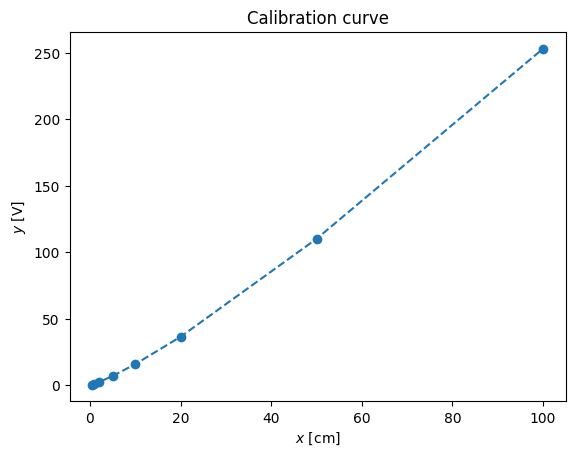

In [11]:
pl.plot(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Calibration curve')

Sensitivity, $K$ is:

$ K_i  = \left( \frac{\partial y}{\partial x} \right)_{x_i} $

In [12]:
K = np.diff(y)/np.diff(x)
print(f'K={K}')

K=[1.2        1.3        1.53333333 1.78       2.06       2.45666667
 2.862     ]


Text(0.5, 1.0, 'Sensitivity')

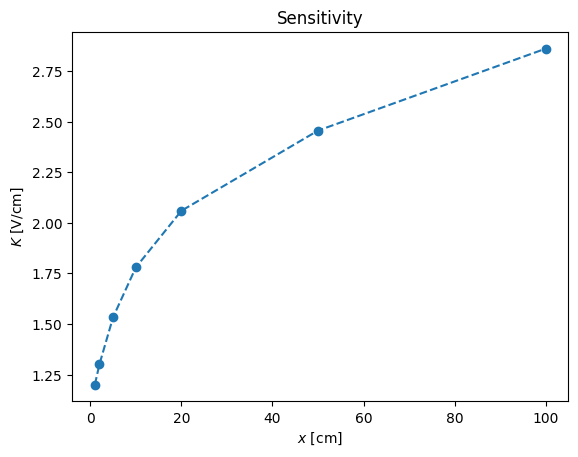

In [13]:
pl.plot(x[1:],K,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Sensitivity')

Instead of working with non-linear curve of sensitivity we can use the usual trick: the logarithmic scale

Text(0.5, 1.0, 'Logarithmic scale')

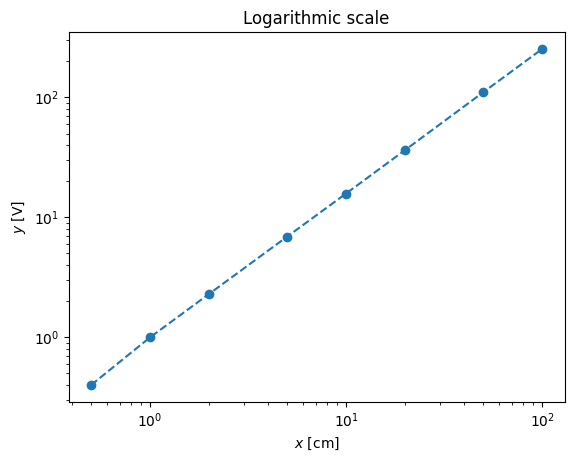

In [14]:
pl.loglog(x,y,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')

$\log(K)$ = [1.32192809 1.20163386 1.19897785 1.19525629 1.20401389 1.20793568
 1.20146294]


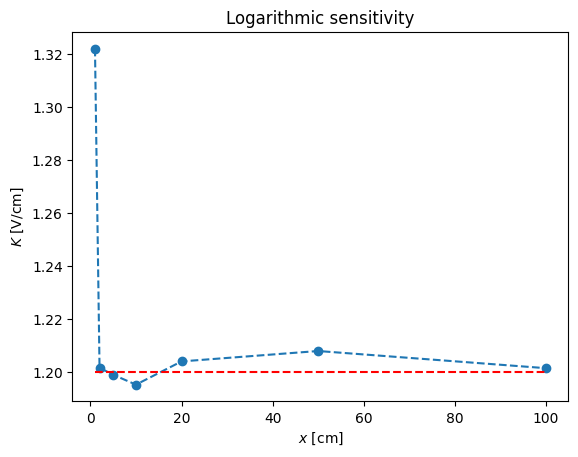

In [15]:
logK = np.diff(np.log(y))/np.diff(np.log(x))
print(f'$\log(K)$ = {logK}')
pl.plot(x[1:],logK,'--o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$K$ [V/cm]')
pl.title('Logarithmic sensitivity')
# pl.hold(True)
pl.plot([x[1],x[-1]],[1.2,1.2],'r--')

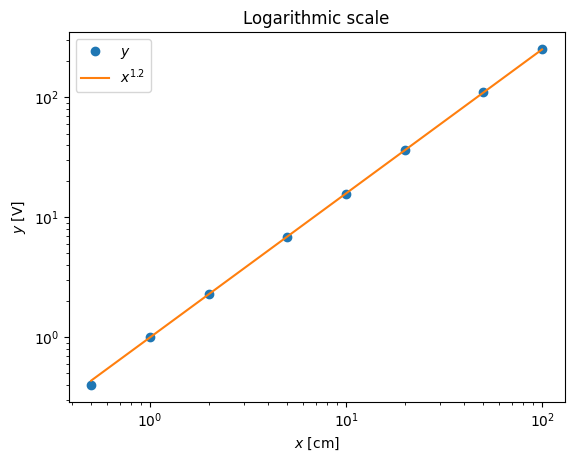

In [16]:
pl.loglog(x,y,'o',x,x**(1.2))
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

Text(0.5, 1.0, 'Deviation plot')

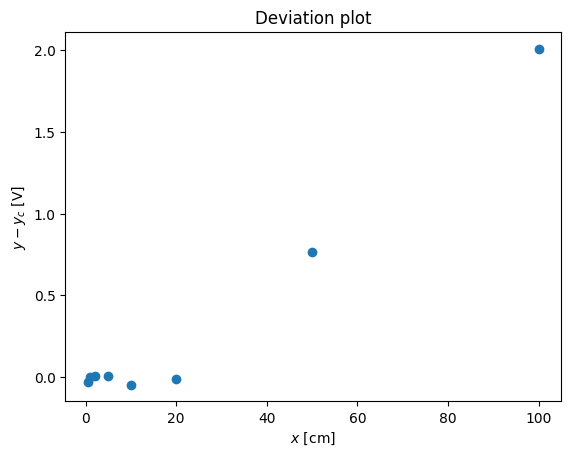

In [17]:
pl.plot(x,y-x**(1.2),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot')
# pl.legend(('$y$','$x^{1.2}$'),loc='best')

## Regression analysis
Following the recipe of http://www.answermysearches.com/how-to-do-a-simple-linear-regression-in-python/124/

In [18]:
from scipy.stats import t
def linreg(X, Y):
    """
    Summary
        Linear regression of y = ax + b
    Usage
        real, real, real = linreg(list, list)
    Returns coefficients to the regression line "y=ax+b" from x[] and y[], and R^2 Value
    """
    N = len(X)

    if N != len(Y):  raise(ValueError, 'unequal length')

    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x
        Sy = Sy + y
        Sxx = Sxx + x*x
        Syy = Syy + y*y
        Sxy = Sxy + x*y

    det =  Sx * Sx - Sxx * N # see the lecture

    a,b = (Sy * Sx - Sxy * N)/det, (Sx * Sxy - Sxx * Sy)/det

    meanerror = residual = residualx = 0.0

    for x, y in zip(X, Y):
        meanerror = meanerror + (y - Sy/N)**2
        residual = residual + (y - a * x - b)**2
        residualx = residualx + (x - Sx/N)**2

    RR = 1 - residual/meanerror
    # linear regression, a_0, a_1 => m = 1
    m = 1
    nu = N - (m+1)

    sxy = np.sqrt(residual / nu)

    # Var_a, Var_b = ss * N / det, ss * Sxx / det

    Sa = sxy * np.sqrt(1/residualx)
    Sb = sxy * np.sqrt(Sxx/(N*residualx))


    # We work with t-distribution, ()
    # t_{nu;\alpha/2} = t_{3,95} = 3.18
    tvalue = t.ppf(1-(1-0.95)/2, nu)

    print("Estimate: y = ax + b")
    print("N = %d" % N)
    print("Degrees of freedom $\\nu$ = %d " % nu)
    print("a = %.2f $\\pm$ %.3f" % (a, tvalue*Sa/np.sqrt(N)))
    print("b = %.2f $\\pm$ %.3f" % (b, tvalue*Sb/np.sqrt(N)))
    print("R^2 = %.3f" % RR)
    print("Syx = %.3f" % sxy)
    print("y = %.2f x + %.2f $\\pm$ %.3f V" % (a, b, tvalue*sxy/np.sqrt(N)))
    return a, b, RR, sxy

In [19]:
print(linreg(np.log(x),np.log(y)))

Estimate: y = ax + b
N = 8
Degrees of freedom $\nu$ = 6 
a = 1.21 $\pm$ 0.005
b = -0.03 $\pm$ 0.012
R^2 = 1.000
Syx = 0.026
y = 1.21 x + -0.03 $\pm$ 0.022 V
(1.2103157469888082, -0.028846347359456247, 0.9998888247342179, 0.02584046039475594)


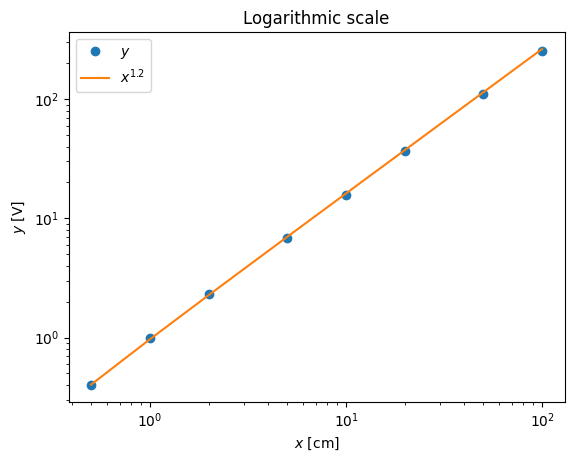

In [20]:
pl.loglog(x,y,'o',x,x**(1.21)-0.0288)
pl.xlabel('$x$ [cm]')
pl.ylabel('$y$ [V]')
pl.title('Logarithmic scale')
pl.legend(('$y$','$x^{1.2}$'),loc='best')

Text(0.5, 1.0, 'Deviation plot')

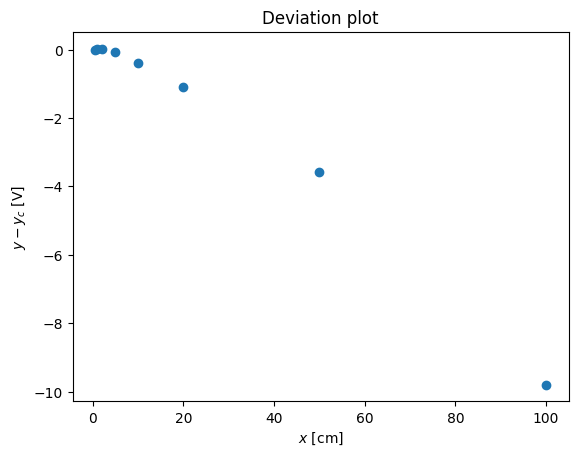

In [21]:
pl.plot(x,y-(x**(1.21)-0.0288),'o')
pl.xlabel('$x$ [cm]')
pl.ylabel('$y - y_c$ [V]')
pl.title('Deviation plot')
# pl.legend(('$y$','$x^{1.2}$'),loc='best')